In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
engine=sqlite3.connect('HW1_DB')
airlines_df = pd.read_sql('select * from airlines',engine)
airports_df = pd.read_sql('select * from airports',engine)
routes_df = pd.read_sql('select * from routes',engine)

In [3]:
aug_flights_df =pd.read_csv('http://big.dataanalytics.education/data/Flights-Aug-2016.csv',index_col=False, header=0);
sep_flights_df =pd.read_csv('http://big.dataanalytics.education/data/Flights-Sep-2016.csv',index_col=False, header=0);
oct_flights_df =pd.read_csv('http://big.dataanalytics.education/data/Flights-Oct-2016.csv',index_col=False, header=0);

In [4]:
aug_flights_df.to_sql(name='flights',con=engine,if_exists='replace', index=False)
sep_flights_df.to_sql(name='flights',con=engine,if_exists='append', index=False)
oct_flights_df.to_sql(name='flights',con=engine,if_exists='append', index=False)

C:\Users\haris\Anaconda3\lib\site-packages\pandas\core\generic.py:1165: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [5]:
con = sqlite3.connect('HW1_DB')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('airlines',), ('airports',), ('routes',), ('performance',), ('shortest',), ('shortroutes',), ('flights',)]


## Step 6.1

In [6]:
query61=('SELECT COUNT(*) FROM flights;')
df=pd.read_sql(query61,engine)
df.iloc[0,0]

1425851

## Step 6.2.1

In [7]:
query621=('SELECT Carrier,Dest, count(*) FROM flights f , routes r WHERE r.routes_airline_code=f.Carrier and r.routes_source_airport_code=f.Origin and r.routes_destination_airport_code=f.Dest GROUP BY f.Carrier,f.Dest')
pd.read_sql(query621,engine)

,Carrier,Dest,count(*)
0,AA,ABQ,446
1,AA,ALB,255
2,AA,AMA,70
3,AA,ANC,44
4,AA,ATL,2832
5,AA,AUS,2265
6,AA,BDL,1015
7,AA,BNA,1418
8,AA,BOI,187
9,AA,BOS,7194


## Step 6.2.2

In [8]:
query622=('SELECT Carrier,Dest, count(*) as count_delayed_flights FROM flights f, routes r WHERE r.routes_airline_code=f.Carrier and r.routes_source_airport_code=f.Origin and r.routes_destination_airport_code=f.Dest and (ArrDelayMinutes>=30 OR Cancelled>0) GROUP BY f.Carrier,f.Dest')
df=pd.read_sql(query622,engine)
df

,Carrier,Dest,count_delayed_flights
0,AA,ABQ,67
1,AA,ALB,15
2,AA,AMA,9
3,AA,ANC,2
4,AA,ATL,297
5,AA,AUS,292
6,AA,BDL,134
7,AA,BNA,139
8,AA,BOI,15
9,AA,BOS,1115


## Step 6.2.3

In [9]:
query622=('SELECT Carrier,Dest, count(*) as count_delayed_flights FROM flights f , routes r WHERE r.routes_airline_code=f.Carrier and r.routes_source_airport_code=f.Origin and r.routes_destination_airport_code=f.Dest and (ArrDelayMinutes>=30 OR Cancelled>0) GROUP BY f.Carrier,f.Dest HAVING COUNT(*)>=1000')
df=pd.read_sql(query622,engine)
df

,Carrier,Dest,count_delayed_flights
0,AA,BOS,1115
1,AA,CLT,1951
2,AA,DFW,4114
3,AA,LAX,1441
4,AA,LGA,1103
5,AA,MIA,1879
6,AA,ORD,2337
7,AA,PHL,1208
8,AA,PHX,1464
9,B6,BOS,1774


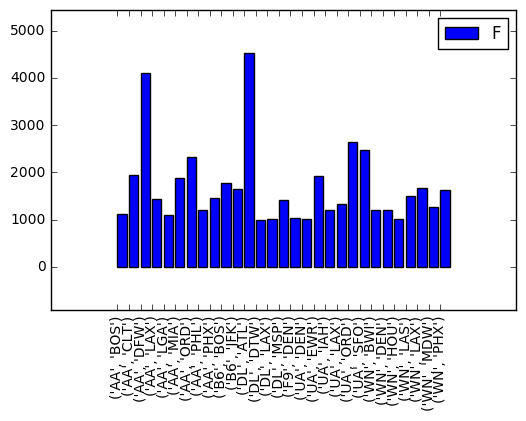

In [10]:
x=list(range(len(df)))
plt.bar(x,df['count_delayed_flights'])
labels=[df[['Carrier','Dest']]]
labels=list(tuple(i) for i in df[['Carrier','Dest']].values)
plt.legend("Frequency")
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

## Step 6.3.1

In [11]:
shortest=('SELECT f.Origin, f.Dest, f.DepTime, MIN(f.ArrTime) as ArrTime, f.Year, f.Month,f.DayofMonth FROM flights f, routes r WHERE r.routes_airline_code=f.Carrier and r.routes_source_airport_code=f.Origin and r.routes_destination_airport_code=f.Dest and f.Month=9 and f.Year=2016 and f.DepTime<f.ArrTime GROUP BY f.Origin, f.Dest, f.DepTime, f.DayofMonth;')
shortestflights=pd.read_sql(shortest,engine)
shortestflights

,Origin,Dest,DepTime,ArrTime,Year,Month,DayofMonth
0,ABE,ATL,539.0,743.0,2016,9,14
1,ABE,ATL,540.0,725.0,2016,9,5
2,ABE,ATL,541.0,739.0,2016,9,15
3,ABE,ATL,542.0,725.0,2016,9,7
4,ABE,ATL,542.0,729.0,2016,9,9
5,ABE,ATL,542.0,742.0,2016,9,13
6,ABE,ATL,543.0,737.0,2016,9,1
7,ABE,ATL,543.0,735.0,2016,9,6
8,ABE,ATL,543.0,729.0,2016,9,8
9,ABE,ATL,543.0,740.0,2016,9,22


In [12]:
shortestflights.to_sql(name='shortest',con=engine, if_exists='replace')
engine.execute("CREATE index my_index ON shortest(Year,Month,DayofMonth,Origin,Dest)")

hop=('select  a.Origin, b.Dest, a.DepTime,b.ArrTime, a.Year, a.Month, a.DayofMonth FROM shortest as a INNER JOIN shortest as b ON a.Year=b.Year AND a.Month=b.Month AND a.DayofMonth=b.DayofMonth AND a.Dest=b.Origin WHERE a.ArrTime+100<=b.DepTime AND EXISTS (SELECT DepTime FROM shortest as c where c.Year=a.Year AND c.Month=a.Month and c.DayofMonth=a.DayofMonth AND c.Origin=a.Origin AND c.Dest=b.Dest AND c.DepTime=a.DepTime AND c.ArrTime>b.ArrTime)')
hoproutes=pd.read_sql(hop,engine)
hoproutes['Hops']=2
hoproutes[['Origin','Dest','Hops','DepTime','ArrTime','Year','Month','DayofMonth']]

,Origin,Dest,Hops,DepTime,ArrTime,Year,Month,DayofMonth
0,ATL,JFK,2,1513.0,2142.0,2016,9,1
1,DEN,JAC,2,1112.0,1450.0,2016,9,18
2,JFK,PHX,2,827.0,1357.0,2016,9,12
3,JFK,PHX,2,827.0,1421.0,2016,9,12
4,MCO,DCA,2,1425.0,2248.0,2016,9,28
5,PHL,MCO,2,1545.0,2029.0,2016,9,22
6,SFO,IAH,2,1428.0,2248.0,2016,9,25


## Step 6.3.2

In [13]:
hoproutes.drop('Hops',1)
frames=[shortestflights,hoproutes]
shortroutes=pd.concat(frames)

shortroutes['DepMins']= (shortroutes['DepTime']%100)+((shortroutes['DepTime']-(shortroutes['DepTime']%100))*0.6)
shortroutes['ArrMins']= (shortroutes['ArrTime']%100)+((shortroutes['ArrTime']-(shortroutes['ArrTime']%100))*0.6)

shortroutes['flighttime']=shortroutes['ArrMins']-shortroutes['DepMins']

shortroutes.to_sql(name='shortroutes', con=engine, if_exists='replace')

query632=('select a.Origin, a.Dest, a.year, a.Month, a.DayofMonth, a.DepTime, a.ArrTime FROM shortroutes as a GROUP BY a.year, a.Month, a.DayofMonth, a.Origin, a.Dest HAVING a.flighttime=MIN(flighttime)')
shortestroutes=pd.read_sql(query632,engine)
shortestroutes

,Origin,Dest,Year,Month,DayofMonth,DepTime,ArrTime
0,ABE,ATL,2016,9,1,543.0,737.0
1,ABQ,ATL,2016,9,1,602.0,1051.0
2,ABQ,BWI,2016,9,1,1351.0,1923.0
3,ABQ,DAL,2016,9,1,1854.0,2127.0
4,ABQ,DEN,2016,9,1,709.0,815.0
5,ABQ,DFW,2016,9,1,457.0,736.0
6,ABQ,HOU,2016,9,1,1328.0,1616.0
7,ABQ,IAH,2016,9,1,1147.0,1438.0
8,ABQ,JFK,2016,9,1,11.0,607.0
9,ABQ,LAS,2016,9,1,1556.0,1622.0


## Step 6.3.2 Extra Credit

In [18]:
def get_next_flight(Origin, Dest, ArrTime, DeptTime, Month, Year, DayOfMonth):
    df=shortestroutes[ (shortestroutes[Origin]==Origin) & (shortestroutes[ArrTime]>=ArrTime) & (shortestroutes[DeptTime]<=DeptTime)  & (shortestroutes[DayOfMonth]==DayOfMonth) & (shortestroutes[Month]==Month) & (shortestroutes[Year]==Year)]
    return df

In [ ]:
def